In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
def create_df_from_csv(path_in):
    df = pd.read_csv(path_in, sep=":", header=None)
    df.columns = ["query", "time"]
    df['query'] = df['query'].apply(lambda x: int(str(x).split(".")[0].split("y")[1]))
    df['time'] = df['time'].apply(lambda x: float(str(x).split("s")[0]))
    df = df.sort_values('query')
    return df

In [ ]:
def plot_queries_time(path_in, path_out) :

    df= create_df_from_csv(path_in)
    y=df.loc[:,"query"]
    width=df.loc[:,"time"]
    print(path_in,"- ",np.sum(width))

    fig,ax = plt.subplots()
    fig.set_size_inches(20, 25, forward=True)

    bars = ax.barh(y,width,color="#d15a5a",align='center',zorder=2)
    labels_text = ax.bar_label(bars)
    ax.invert_yaxis()
    ax.grid(linestyle='--',zorder=0)

    for container in ax.containers:
        ax.bar_label(container)
    plt.yticks(y)
    plt.axvline(np.average(y), color='#6ac482',label="Average Execution Time(s)",zorder=3)
    plt.legend()
    plt.ylabel("Query",fontsize=25)
    plt.xlabel("Execution Time(s)",fontsize=25)
    plt.savefig(path_out, format="png",bbox_inches='tight')
    plt.show()


# Power test plot

In [ ]:
#change filename if needed
pt_in ="queries_scale"
pt_out = "power_test_scale_"
tt_in = "troughput_test_"
tt_out = "troughput_test_by_scale_"
for i in range(1,9,2) :
   #Power test
   file_name = pt_in + str(i) +".txt"
   file_out =  pt_out + str(i) +".png"
   plot_queries_time(file_name,file_out)


# Throughput test

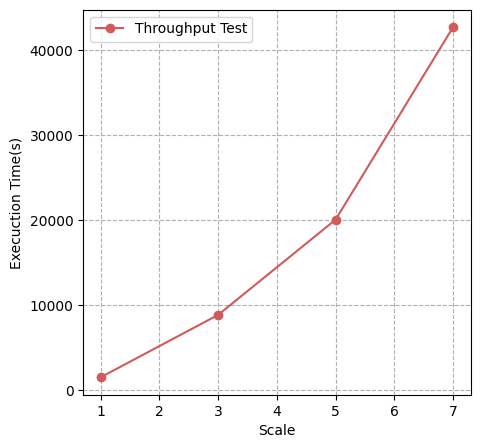

In [ ]:
df_scale = pd.read_csv('throughput_test.txt', sep=":", header=None)#change file name if needed
df_scale.columns = ["scale", "time"]
df_scale['scale'] = df_scale['scale'].apply(lambda x: str(x).replace("_",""))
df_scale['time'] = df_scale['time'].apply(lambda x: float(str(x).split("s")[0]))

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.plot(df_scale['scale'], df_scale["time"], '-o',color="#d15a5a",label="Throughput Test")

ax.grid(linestyle='--')
plt.legend()
plt.ylabel("Execuction Time(s)")
plt.xlabel("Scale")
plt.savefig("thr_test_total.png", format="png",bbox_inches='tight')#change file name if needed

plt.show()

# Load test

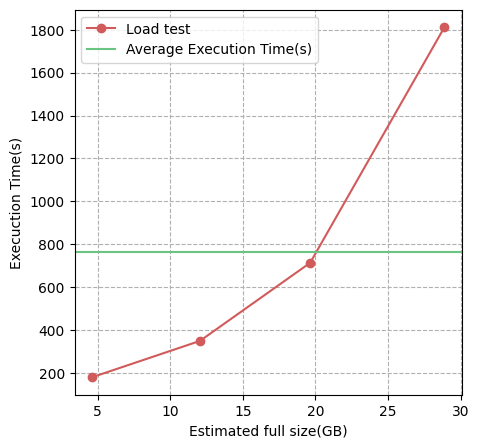

In [ ]:
df_scale = pd.read_csv('load_test.txt', sep=":", header=None)#change file name if needed
df_scale.columns = ["scale", "time"]
df_scale['scale'] = df_scale['scale'].apply(lambda x: str(x).split("_")[0])
df_scale['time'] = df_scale['time'].apply(lambda x: float(str(x).split("s")[0]))
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.plot(df_scale["scale"], df_scale["time"], '-o',color="#d15a5a",label="Load test")

ax.grid(linestyle='--')

plt.axhline(np.average(df_scale["time"]), color='#6ac482',label="Average Execution Time(s)")
plt.legend()

plt.ylabel("Execuction Time(s)")
plt.xlabel("Estimated full size(GB)")
plt.savefig("load_test_total_gb.png", format="png",bbox_inches='tight')#change file name if needed
plt.show()

# Comparaison Power test and Throughput test

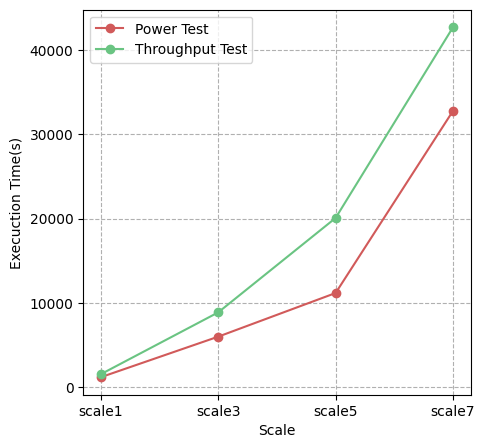

In [ ]:
df_scale = pd.read_csv('load_total.txt', sep="\t", header=None)#change file name if needed
df_scale.columns = ["scale", "time"]

df_scale2 = pd.read_csv('throughput_test.txt', sep=":", header=None)#change file name if needed
df_scale2.columns = ["scale", "time"]
df_scale2['scale'] = df_scale2['scale'].apply(lambda x: str(x).replace("_",""))
df_scale2['time'] = df_scale2['time'].apply(lambda x: float(str(x).split("s")[0]))

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.plot(df_scale["scale"], df_scale["time"], '-o',color="#d15a5a",label="Power Test")
plt.plot(df_scale2["scale"], df_scale2["time"], '-o',color="#6ac482",label="Throughput Test")

ax.grid(linestyle='--')
plt.legend()
plt.ylabel("Execuction Time(s)")
plt.xlabel("Scale")
plt.savefig("comparison_by_scale.png", format="png",bbox_inches='tight')#change file name if needed
plt.show()

# Optimize vs normal queries


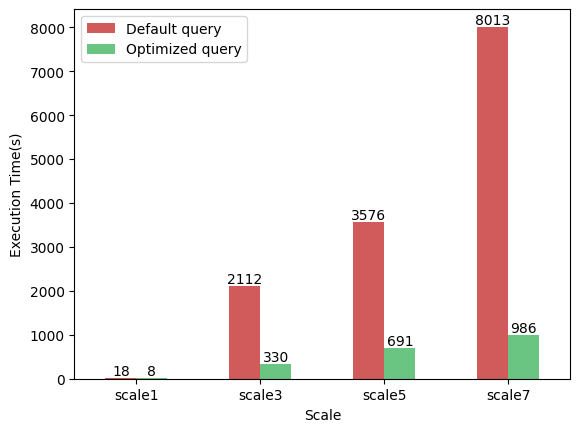

In [ ]:
df = pd.read_csv('optimized.txt', sep="\t", header=None)
df.columns = ["scale", "Default query",'Optimized query']
ax = df.set_index('scale').plot.bar(rot = 0,color=['#d15a5a','#6ac482'],ylabel="Execution Time(s)",xlabel="Scale")
for container in ax.containers:
    ax.bar_label(container)
plt.savefig("diff_q72.png", format="png",bbox_inches='tight')
plt.show()